<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats

sns.set_context("poster")
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style("whitegrid")

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = "../DATA/Sacramento_transactions.csv"
df=pd.read_csv(house_csv)

In [4]:
df.sample(10)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
926,7687 HOWERTON DR,SACRAMENTO,95831,CA,2,2,1177,Residential,Thu May 15 00:00:00 EDT 2008,171750,38.480859,-121.539745
685,4290 BLACKFORD WAY,SACRAMENTO,95823,CA,3,2,1513,Residential,Fri May 16 00:00:00 EDT 2008,193500,38.470494,-121.454162
370,5380 VILLAGE WOOD DR,SACRAMENTO,95823,CA,2,2,901,Residential,Mon May 19 00:00:00 EDT 2008,121500,38.454949,-121.440578
379,7349 FLETCHER FARM DR,SACRAMENTO,95828,CA,4,2,1587,Residential,Mon May 19 00:00:00 EDT 2008,127500,38.490690,-121.382619
896,7928 36TH AVE,SACRAMENTO,95824,CA,3,2,1127,Residential,Thu May 15 00:00:00 EDT 2008,130000,38.520490,-121.411383
574,11 E ST,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884879,-121.290257
734,16 BRONCO CREEK CT,SACRAMENTO,95835,CA,4,2,1876,Residential,Fri May 16 00:00:00 EDT 2008,243500,38.674226,-121.525497
746,1890 GENEVA PL,SACRAMENTO,95825,CA,3,1,1520,Residential,Fri May 16 00:00:00 EDT 2008,255000,38.599449,-121.400305
611,3812 CYPRESS ST,SACRAMENTO,95838,CA,2,1,900,Residential,Fri May 16 00:00:00 EDT 2008,71000,38.636877,-121.444948
692,2880 CANDIDO DR,SACRAMENTO,95833,CA,3,2,1127,Residential,Fri May 16 00:00:00 EDT 2008,199900,38.618019,-121.510215


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [9]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

ANSWER

`price` is the target variable -- it is what we want to predict

#### 2.2 List all possible variables which might be Predictor variable.

ANSWER
- Geographic data ("location, location, location"): `zip`, `latitude` and `longitude`.  
    - I don't think `city` or `state` will be particularly useful since they do not distinguish the data
- Information about the building: `beds`, `bath`, `sq_ft`

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [36]:
# ANSWER
df.corr(numeric_only=True)

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


In [37]:
pd.__version__

'2.2.2'

In [ ]:


predictors = df[['beds', 'baths', 'sq__ft', 'price']]

predictors.corr()

`baths` is the strongest predictor: It has the strongest correlation (closest to 1)

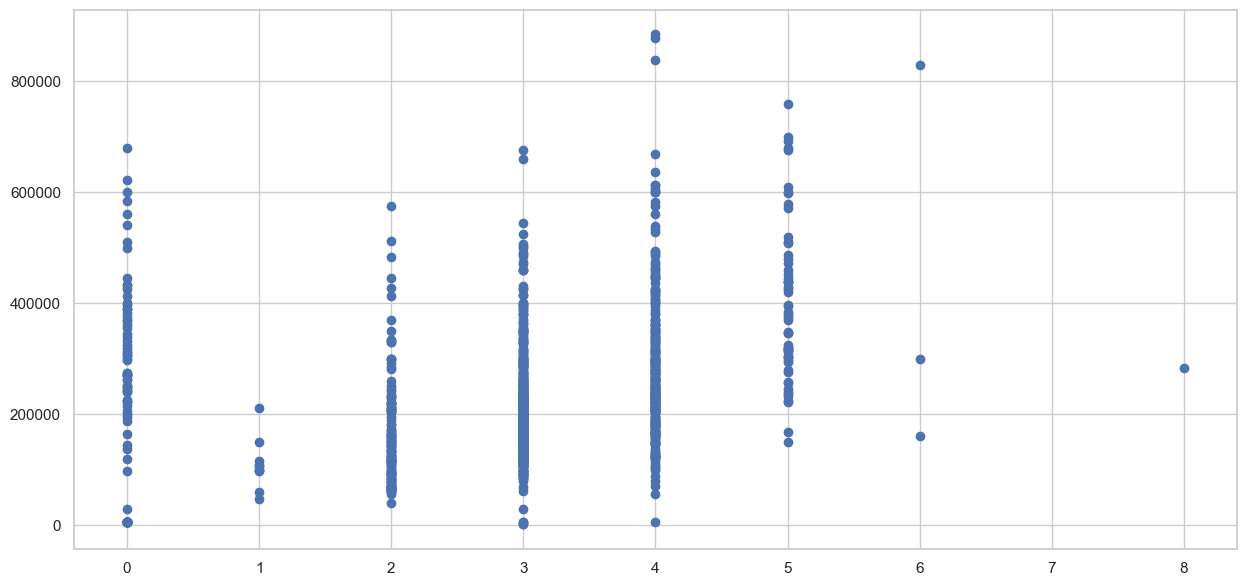

In [35]:
def draw_scatter_plot(X, Y):
    fig = plt.figure(figsize=(15,7))
    ax = plt.gca()
    ax.scatter(X, Y, c='b')
    plt.show();

draw_scatter_plot(predictors['beds'], predictors['price'])

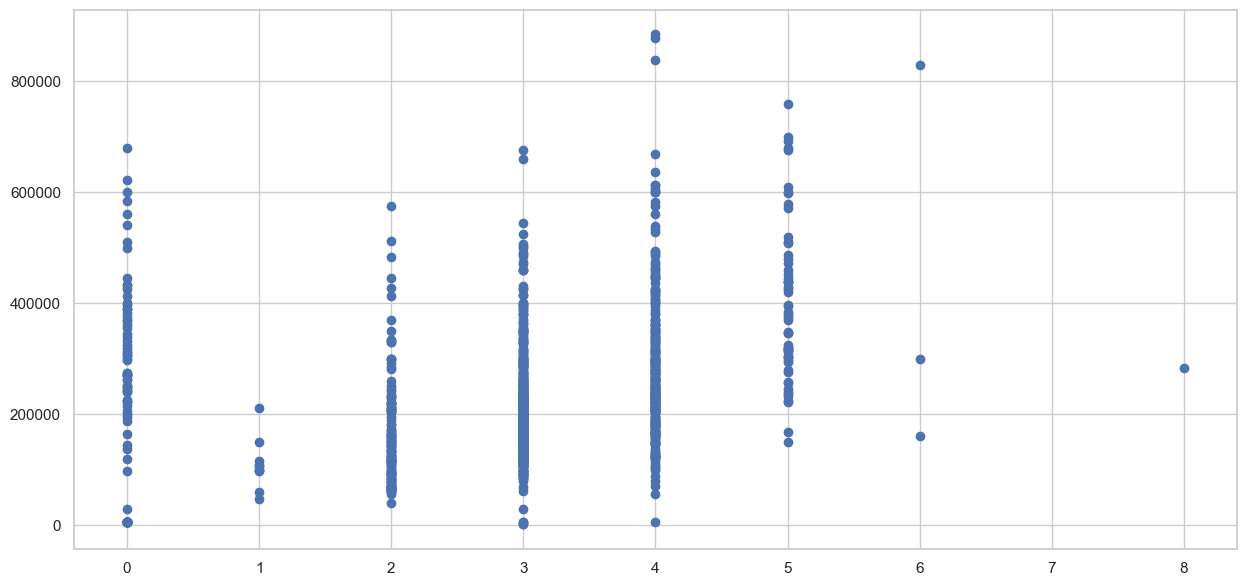

In [34]:
draw_scatter_plot(predictors.beds, predictors.price)

<Axes: xlabel='sq__ft', ylabel='price'>

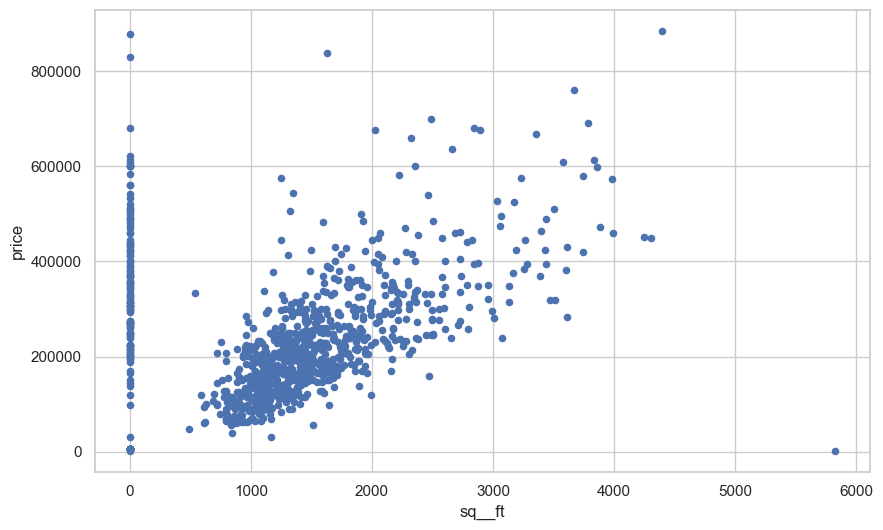

In [25]:
predictors.plot.scatter(x='sq__ft', y='price')

⬆️ **What are all these with 0 sq. ft.?**

In [26]:
sqft0 = predictors[predictors.sq__ft == 0]
sqft0

,beds,baths,sq__ft,price
73,0,0,0,206000
89,0,0,0,244500
100,0,0,0,263500
121,0,0,0,320000
126,0,0,0,339500
...,...,...,...,...
934,0,0,0,188000
947,0,0,0,200100
966,3,2,0,220000
970,0,0,0,224000


sq. ft. == 0:
- If # bedrooms and # of bathrooms are also 0, could be a lot only (no building)
- If # bedrooms or # bathrooms > 0, that doesn't make sense. 

I would exclude 0-sq. ft. records with positive #s for bed/bath rooms from the data set.


When considering sq. ft. as a predictor, I would exclude empty lots from that analysis.

In [29]:
zero_values = predictors[(predictors.beds == 0) | (predictors.baths == 0) | (predictors.sq__ft == 0)]
zero_values.shape

(171, 4)

<Axes: xlabel='sq__ft', ylabel='price'>

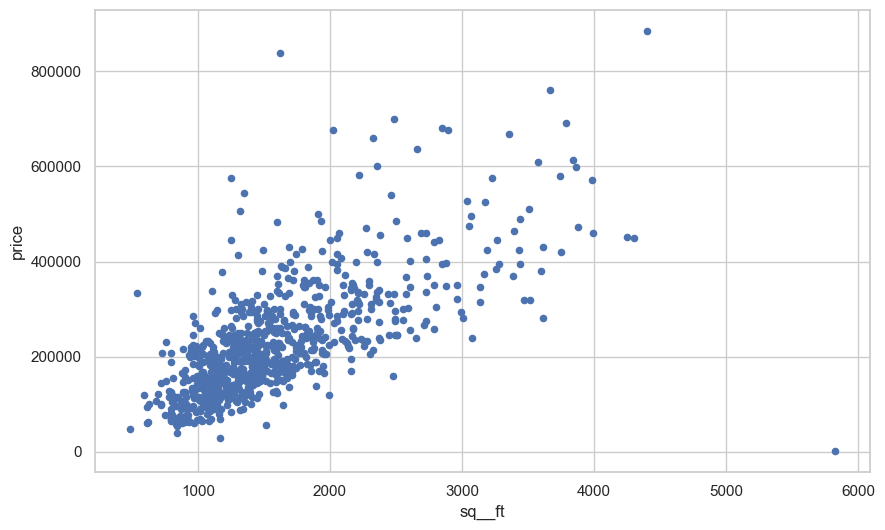

In [48]:
pos_sqft = predictors[predictors.sq__ft > 0].copy()

pos_sqft.plot.scatter(x='sq__ft', y='price')

In [30]:
814 + 171

985

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict the price of a house using the price values alone? (Hint: it is a simple calculation)



In [42]:
# ANSWER

easiest_price_prediction = sqft0['price'].mean()
print(easiest_price_prediction)


256497.81871345028


If price is normally distributed we can predict within a confidence interval.

Is it normally distributed?

array([[<Axes: title={'center': 'price'}>]], dtype=object)

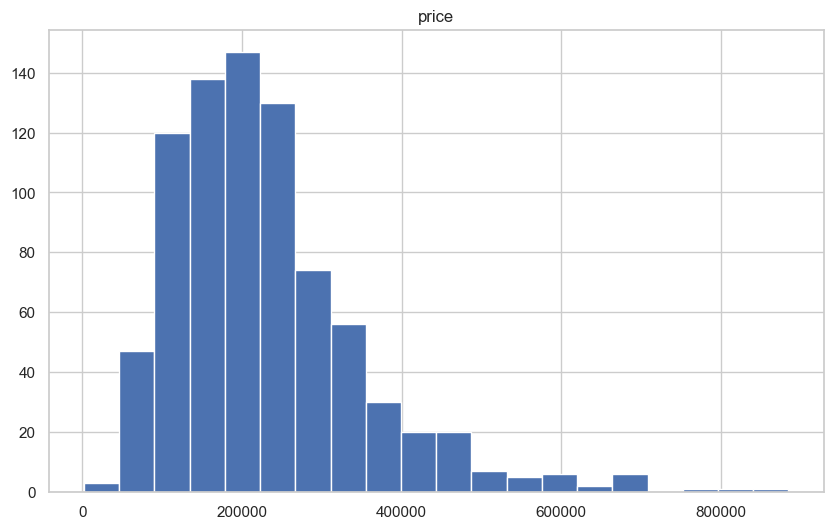

In [50]:
pos_sqft.hist(column='price', bins=20)

NO


#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [52]:
# ANSWER
pos_sqft["mean_price"] = pos_sqft['price'].mean()
pos_sqft['delta_y'] = (pos_sqft['price'] - pos_sqft['mean_price']).abs()

pos_sqft.sample(5)


,beds,baths,sq__ft,price,mean_price,delta_y
45,4,1,1120,164000,229448.369779,65448.369779
632,4,2,1253,125000,229448.369779,104448.369779
980,4,3,2280,232425,229448.369779,2976.630221
402,3,2,1100,167000,229448.369779,62448.369779
87,3,2,2163,242638,229448.369779,13189.630221


#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [54]:
# ANSWER
X = pos_sqft.sq__ft
Y = pos_sqft.price

# Each of these is a pandas Series

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [57]:
# ANSWER
y_deltas = Y - Y.mean()
x_deltas = X - X.mean()

deltas_product = x_deltas * y_deltas
x_deltas_squared = x_deltas ** 2

beta1 = deltas_product.sum() / x_deltas_squared.sum()
beta1

# What went wrong here:
# beta1 = ( (Y - Y.mean()) * (X - X.mean()) ).sum() / (X - X.mean()**2).sum()
# beta1

125.21648667984462

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [59]:
# ANSWER
beta0 = Y.mean() - beta1 * X.mean()
beta0

30210.633866918943

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [60]:
# ANSWER
y_hat = beta0 + beta1 * X
y_hat

0      134891.616731
1      176338.273822
2      129882.957264
3      136895.080518
4      130008.173751
           ...      
980    315704.223497
981    215155.384693
982    182473.881670
983    241200.413922
984    200755.488725
Name: sq__ft, Length: 814, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [61]:
# ANSWER
res = Y - y_hat
res

0      -75669.616731
1     -108126.273822
2      -61002.957264
3      -67588.080518
4      -48108.173751
           ...      
980    -83279.223497
981     18844.615307
982     52526.118330
983     -5899.413922
984     34982.511275
Length: 814, dtype: float64

##### 2.7.E Find R-Squared

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:
SS regression: sum of squares due to regression

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [65]:
# ANSWER
ss_tot = ((Y - Y.mean())**2).sum()
ss_res = ((Y - y_hat)**2).sum()
r_sq = 1 - (ss_res / ss_tot)

r_sq

0.4812307133326901

FUNCTION:

In [66]:
def r_squared(actual_values, predicted_values):
    ss_tot = ((actual_values - actual_values.mean())**2).sum()
    ss_res = ((actual_values - predicted_values)**2).sum()
    r_sq = 1 - (ss_res/ss_tot)
    return r_sq


r_squared(Y, y_hat)

0.4812307133326901

##### 2.7.F [BONUS] Draw Plot of Predicted Line

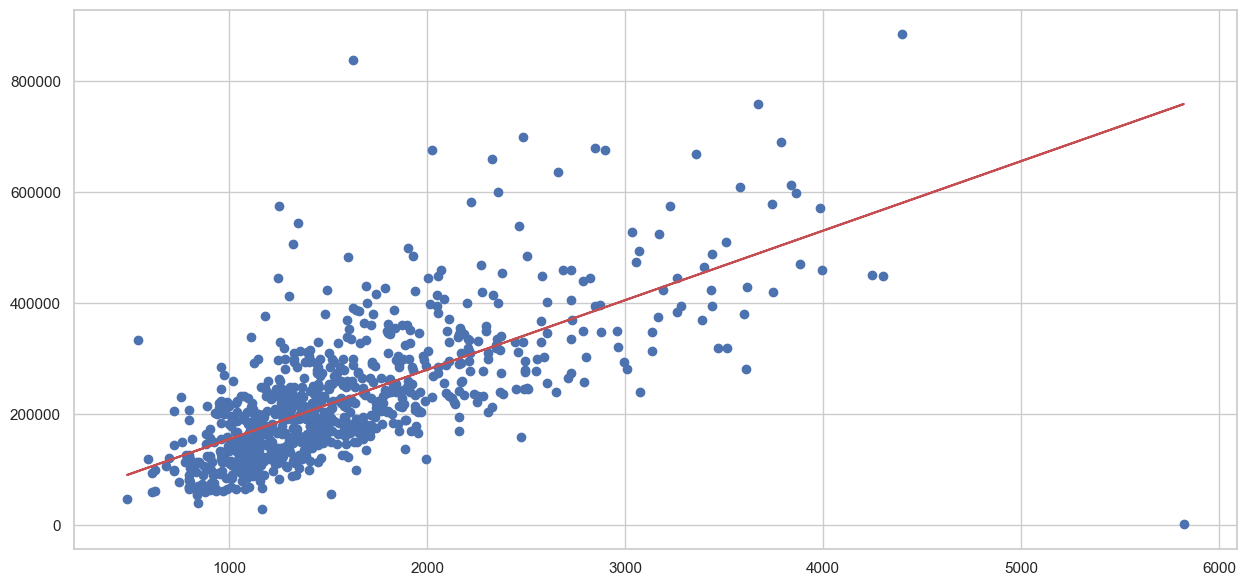

In [77]:
# ANSWER
def draw_plot(X, Y, Ymean):
    fig = plt.figure(figsize=(15,7))
    ax = plt.gca()
    ax.scatter(X, Y, c='b')
    ax.plot(X, Ymean, color='r');

    plt.show();

draw_plot(X, Y, y_hat)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

In [80]:
# ANSWER

pos_sqft.columns


Index(['beds', 'baths', 'sq__ft', 'price', 'mean_price', 'delta_y'], dtype='object')

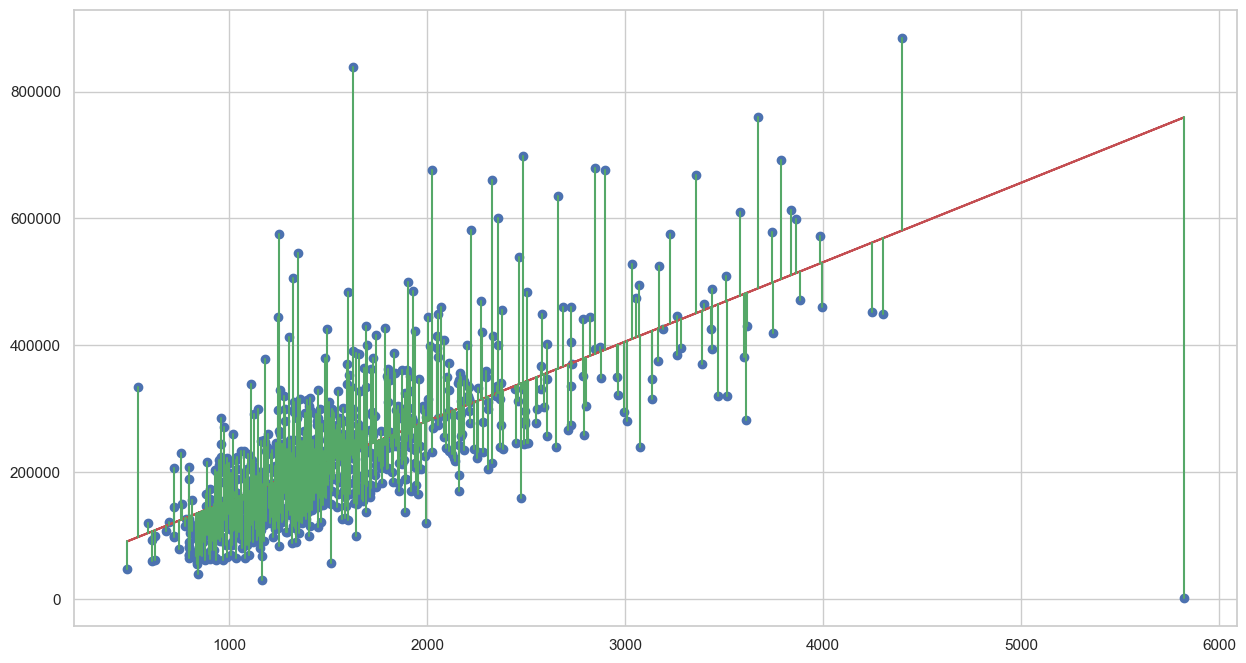

In [81]:
pos_sqft['predicted_price'] = beta0 + beta1 * pos_sqft['sq__ft']

fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

ax = fig.gca()

ax.scatter(x=X, y=Y, c='b')
ax.plot(X, y_hat, color='r');

for _, row in pos_sqft.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['predicted_price']), 'g-')

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [78]:
# ANSWER
sqft = 1204
predicted_price = beta0 + beta1 * sqft
print(predicted_price)

180971.28382945186




---



---



> > > > > > > > > © 2024 Institute of Data


---



---



